In [17]:
import pandas as pd 
data = pd.read_csv('data.csv')
data.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [18]:
for i in data.columns:
    print(data[i].dtype)

int64
object
float64
object
float64
float64
float64
float64
float64
float64
float64
object
object
float64
float64
float64
float64
int64


In [19]:
#找到所有连续的特征，方法一
continuous_features = []
for i in data.columns:
    if data[i].dtype != 'object':
        continuous_features.append(i)
continuous_features

['Id',
 'Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

In [20]:
#python 实现了更简单的方法
continuous_features = data.select_dtypes(include=['float64','int64']).columns.tolist() #连续特征
continuous_features

['Id',
 'Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

这里我们思考一下，既然实现一个路径有很多方法，到底什么方法是最好的呢？

如果你在执行复杂的项目，你需要考虑到内存管理、运行效率、算法负责度，甚至是代码美观性。

但是目前你的目标就是达到目的即可，所以你应该用最简单最直观的方法，这便于你读者一眼知道你在做什么。也不要过于记忆太多新的函数加大自己的学习成本。

所以这里我推荐第一种方法，但是你问ai 他会告诉你第二种，第二种能看懂即可


### 初识matplotlib库

作为一个朴素的人类，你觉得绘制一个图需要什么？
1. 需要指定图的类型，比如折线图，散点图，柱状图等
2. 需要指定图的坐标轴，比如x轴和y轴，并且传入数据
3. 需要指定图的标题，比如x轴和y轴的标签，以及标题

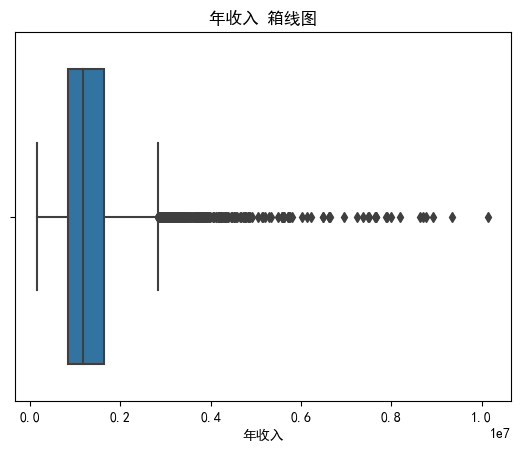

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

# 设置全局字体为支持中文的字体（例如 SimHei）
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False

sns.boxplot(x = data['Annual Income'])
plt.title('年收入 箱线图')
plt.xlabel('年收入')
plt.show()

数值变量有的是连续变量 有的是离散变量

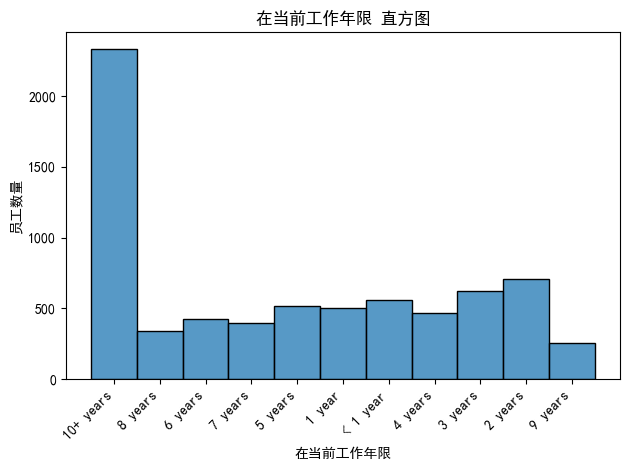

In [22]:
# 绘制直方图
sns.histplot(data['Years in current job'])
plt.title('在当前工作年限 直方图')
plt.xlabel('在当前工作年限')
plt.ylabel('员工数量')
plt.xticks(rotation=45,ha='right') #旋转x轴标签，使标签不重叠
plt.tight_layout() #自动调节子图参数，提供足够的空间
plt.show()

## 绘制特征和标签的关系

标签是离散的，特征如果是连续的应该绘制什么图？

可以分别考虑违约和不违约情况下的连续特征，画2个箱线图




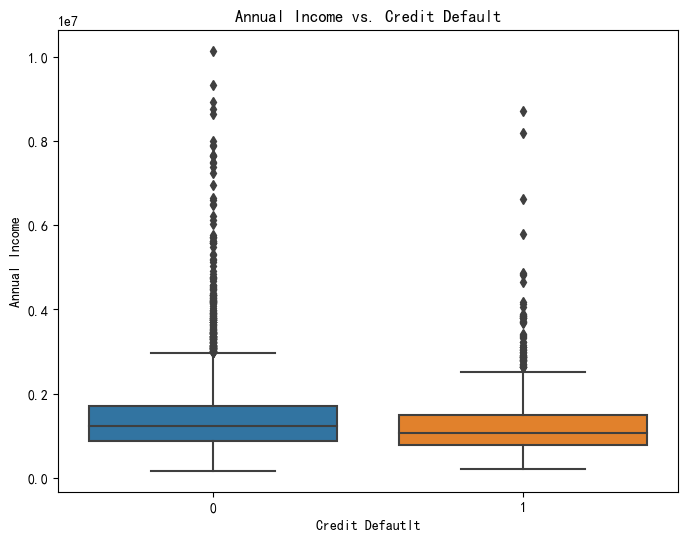

In [23]:
# 箱线图
plt.figure(figsize=(8,6))
sns.boxplot(x='Credit Default',y='Annual Income',data=data)
plt.title('Annual Income vs. Credit Default')
plt.xlabel('Credit Defautlt')
plt.ylabel('Annual Income')
plt.show()

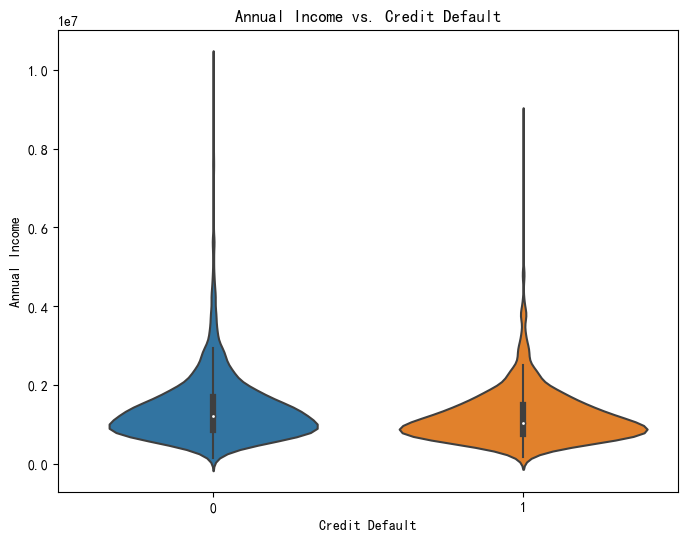

In [24]:
# 小提琴图
plt.figure(figsize=(8,6))
sns.violinplot(x='Credit Default',y='Annual Income',data=data)
plt.title('Annual Income vs. Credit Default')
plt.xlabel('Credit Default')
plt.ylabel('Annual Income')
plt.show()

但是实际上连续变量也可以绘制类似于直方图的图像，可以用核密度估计来完成边缘的柔和化

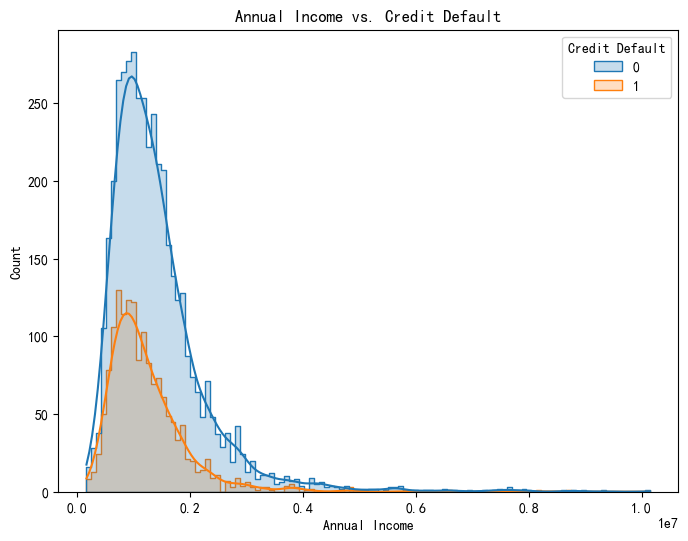

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'Annual Income',hue='Credit Default',data=data,kde=True,element='step')
plt.title('Annual Income vs. Credit Default')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

绘制离散变量和标签的关系

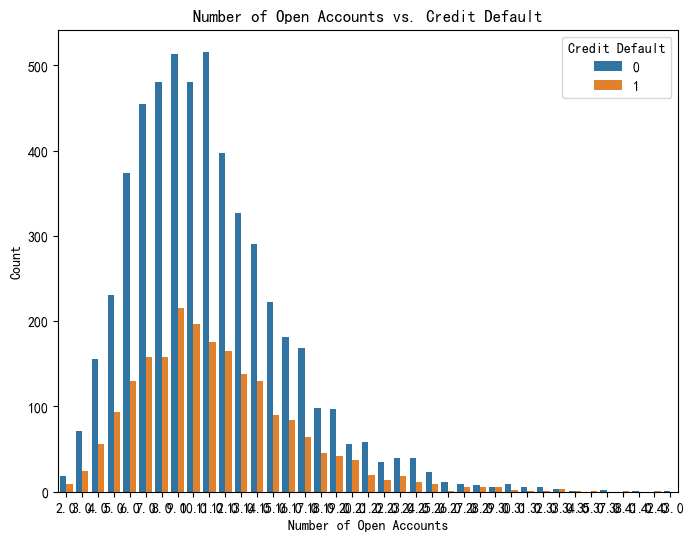

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x='Number of Open Accounts',hue='Credit Default',data=data) #hue是分类,x是数值
plt.title('Number of Open Accounts vs. Credit Default')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Count')
plt.show()

可以看到 如果number of open accounts的值太多 就会很散，不美观，所以这时候采取分组的措施

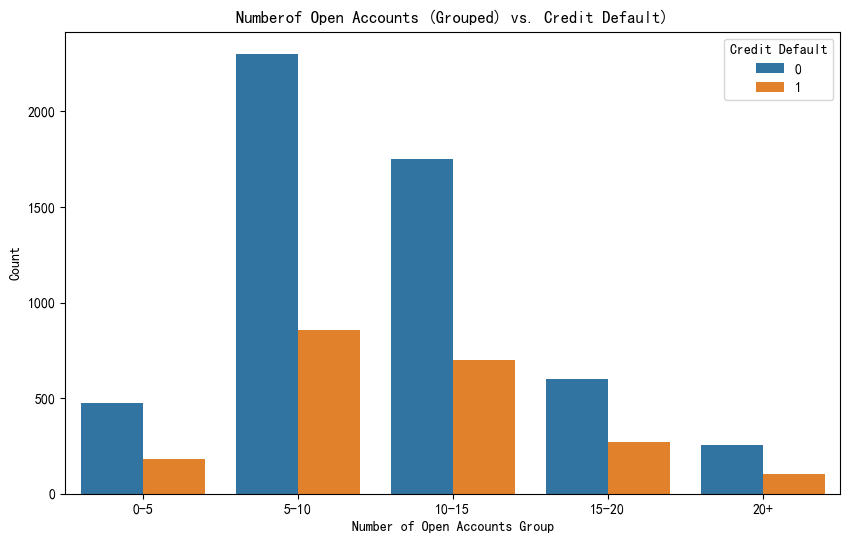

In [27]:
# 将 "Number of Open Accounts" 列分组
data['Open Accounts Group'] = pd.cut(data['Number of Open Accounts'],bins=[0,5,10,15,20,float('inf')],labels=['0-5','5-10','10-15','15-20','20+'])
plt.figure(figsize=(10,6))
sns.countplot(x='Open Accounts Group',hue='Credit Default',data=data)
plt.title('Numberof Open Accounts (Grouped) vs. Credit Default)')
plt.xlabel('Number of Open Accounts Group')
plt.ylabel('Count')
plt.show()

现在开始尝试对与其他的连续变量  离散变量都分别绘制 

观察一下数据的特点，很多时候我们需要单纯从数据分布来认识数据，这才是真正有价值的事情。
